In [79]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 

In [80]:
file_name = "top_hiphop_artists_tracks.csv"

In [81]:
df = pd.read_csv(file_name)

In [82]:
print("Dataset Loaded Successfully. First few rows:")
display(df.head())
print("Dataset Shape:", df.shape)

Dataset Loaded Successfully. First few rows:


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


Dataset Shape: (440, 5)


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [84]:
print("Column Names:", df.columns.tolist())

Column Names: ['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID']


In [85]:
print("Summary Statistics:")
display(df.describe())

Summary Statistics:


,Popularity,Duration (ms)
count,440.000000,440.000000
mean,75.736364,206810.040909
std,9.886534,53576.930289
min,29.000000,81666.000000
25%,70.000000,172778.500000
50%,77.000000,201866.000000
75%,83.000000,235119.750000
max,97.000000,501648.000000


In [93]:
print("Median Values:")
display(df.median(numeric_only=True))

print("Mode Values:")
display(df.mode(numeric_only=True).iloc[0])

print("Unique Values Count:")
display(df.nunique())

Median Values:


Popularity           77.0
Duration (ms)    201866.0
dtype: float64

Mode Values:


Popularity           76.0
Duration (ms)    231746.0
Name: 0, dtype: float64

Unique Values Count:


Artist           115
Track Name       412
Popularity        51
Duration (ms)    410
Track ID         413
dtype: int64

In [95]:
for column in df.select_dtypes(include=[np.number]).columns:
    print(f"{column}: Min={df[column].min()}, Max={df[column].max()}")

Popularity: Min=29, Max=97
Duration (ms): Min=81666, Max=501648


In [97]:
print("Missing Values:")
display(df.isnull().sum())

Missing Values:


Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [99]:
df.dropna(inplace=True)

In [101]:
df = df.drop_duplicates()

In [103]:
categorical_columns = ['artist', 'genre', 'album']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].str.strip().str.lower()

In [105]:
if 'duration_ms' in df.columns:
    df['duration_s'] = df['duration_ms'] / 1000
    df.drop(columns=['duration_ms'], inplace=True)
if 'track_id' in df.columns:
    print("Is 'track_id' a unique identifier?:", df['track_id'].is_unique)
if 'artist' in df.columns and 'popularity' in df.columns:
    df = df.sort_values(by=['artist', 'popularity'], ascending=[True, False])

In [107]:
if 'genre' in df.columns and 'popularity' in df.columns:
    genre_grouped = df.groupby("genre")["popularity"].mean().reset_index()
    print("Average Popularity by Genre:")
    display(genre_grouped)

No valid numerical features found for visualization. Plotting alternative correlation heatmap.


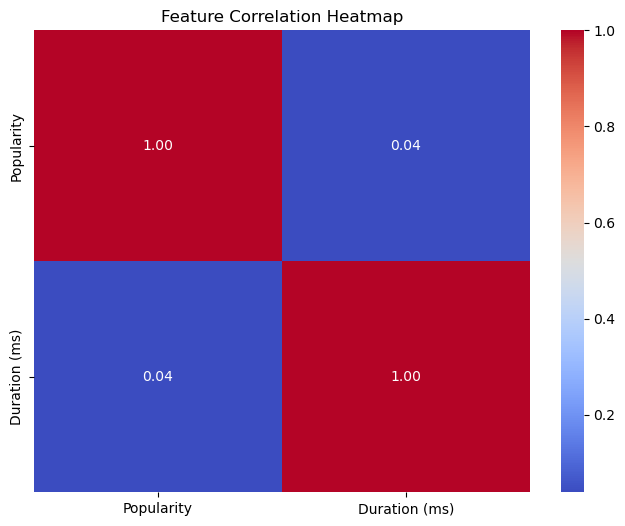

In [109]:
available_features = [col for col in ['popularity', 'danceability', 'energy'] if col in df.columns]
if available_features:
    df[available_features].hist(figsize=(10, 6), bins=20)
    plt.suptitle("Feature Distributions")
    plt.show()
else:
    print("No valid numerical features found for visualization. Plotting alternative correlation heatmap.")
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Feature Correlation Heatmap")
    plt.show()

In [111]:
print("Cleaned Dataset Preview:")
display(df)
%store df

Cleaned Dataset Preview:


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
433,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
434,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS


Stored 'df' (DataFrame)
